In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_03.ipynb")

In [2]:
rng_seed = 42

## Homework 3

## <em> Linear Algebra - Gaussian Elimination, SVD, Polynomial Regression, PCA, KNN, and Data Modeling</em>

### Important Notes Regarding HW3 and Going Forward
**From HW3 forward, we will be making use of astro.datahub.berkeley.edu instead of the Standard Datahub.** If you've clicked the nbgitpuller link on the Github page, you should already be taken here automatically.
**In astro.datahub, we have our own shared environment which has all relevant packages installed.** In the upper right corner of the notebook, click "Python" and make sure you are using **Python(Physics188-288)** as your Jupyter Kernel environment. Otherwise you will not have access to the correct package imports for course assignments.

As I have mentioned at the beginning of the semester, DataHub will be the only officially supported place to complete the homeworks. You are free to make use of other Jupyter environments (e.g. locally or on Colab), but those will not be supported and we will not be able to debug those for you. **I highly recommend you make use of DataHub for your homeworks.**

### Imports

In [3]:
import numpy as np
from scipy.integrate import quad
import sklearn as sk
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<!-- BEGIN QUESTION -->

#### Problem  1 - Solving Least Squares Using Normal Equations and SVD

(Reference - NR 15.4) We fit a set of 50 data points $(x_i, y_i)$ to a polynomial $y(x) = a_0 + a_1x + a_2x^2 + a_3x^3$. (Note that this problem is linear in $a_i$ but nonlinear in $x_i$). The uncertainty $\sigma_i$ associated with each measurement $y_i$ is known, and we assume that the $x_i$'s are known exactly. To measure how well the model agrees with the data, we use the chi-square merti function: <br>

$$ \chi^2 = \sum_{i=0}^{N-1} \big( \frac{y_i-\sum_{k=0}^{M-1}a_k x^k}{\sigma_i} \big)^2. $$

<br>
where N = 50 and M = 4. Here, $1, x, ... , x^3$ are the basis functions.
<br><br>
<span style="color:blue"> <i> 1. Plot data (make sure to include error bars). (Hint - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) </i></span><br>

In [4]:
# Load a given 2D data
data = np.loadtxt("./Problem1_data.dat")
x = data[:,0]
y = data[:,1]
sig_y = data[:,2]

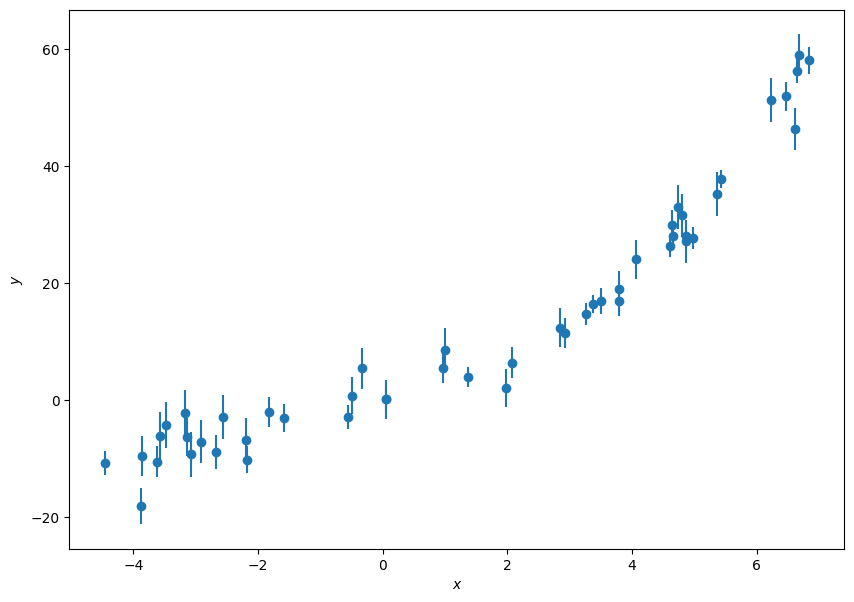

In [5]:
# Make plot
plt.figure(figsize = (10, 7))
# Scatter plot

plt.errorbar(x, y, yerr = sig_y, fmt = 'o', label = 'Data with error bars')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

<!-- END QUESTION -->

We will pick as best parameters those that minimize $\chi^2$.<br><br>
First, let $\bf A$ be a matrix whose $N \times M$ components are constructed from the $M$ basis functions evaluated at the $N$ abscissas $x_i$, and from the $N$ measurement errors $\sigma_i$, by the prescription
$$ A_{ij} = \frac{X_j(x_i)}{\sigma_i} $$
<br>where $X_0(x) = 1,\ X_1(x) = x,\ X_2(x) = x^2,\ X_3(x) = x^3$. We call this matrix $\bf A$ the design matrix.
<br><br>
Also, define a vector $\bf b$ of length $N$ by
$$ b_i = \frac{y_i}{\sigma_i} $$
<br>and denote the $M$ vector whose components are the parameters to be fitted ($a_0, a_1, a_2, a_3$) by $\bf a$.
<br><br>
<span style="color:blue"><i> 2. Define the design matrix A. (Hint: Its dimension should be NxM = 50x4.) Also, define the vector b. </i></span><br>


In [6]:
# Define A
A = np.vstack([np.ones_like(x) / sig_y,x / sig_y,x**2 / sig_y,x**3 / sig_y]).T
# Define b
b = y / sig_y
print(b)

[ 0.60083933  6.57746667  2.22758574 11.44381562  4.42561743 -1.27048881
 -1.10920189  1.54337324 -4.51688953 -2.41002883 -1.94143754  7.66081051
  8.58068515 -1.96404621  0.03226013 -5.78879275  7.74281779  2.12455553
 -3.0870171  -5.21475617 16.97929868 14.79378215 25.4626895  26.37650366
  7.40991409  6.03536611  7.16687459 24.38340515 13.38919514  2.44614498
  3.65643693 10.74720102 -0.55961163 12.92589024  8.81978901 -0.81108112
  9.33835216 -1.81851989  2.20953418 -2.8096348  15.09080603  0.22711891
 -0.79068759 16.68633994 -1.41608589 20.90822132 11.86367256 -4.03992656
 -1.5455174   0.02691957]


In [7]:
grader.check("q1.2")

q1.2 results: All test cases passed!

Minimize $\chi^2$ by differentiating it with respect to all $M$ parameters $a_k$ vaishes. This condition yields the matrix equation <br>
$$ \sum_{j=0}^{M-1} \alpha_{kj}a_j = \beta_k$$
<br> where $\bf \boldsymbol \alpha = A^T \cdot A$ and $\bf \boldsymbol \beta = A^T \cdot b$ ($\boldsymbol \alpha$ is an $M \times M$ matrix, and $\boldsymbol \beta$ is a vector of length $M$). This is the normal equation of the least squares problem. In matrix form, the normal equations can be written as:
$$ \bf \boldsymbol \alpha \cdot a = \boldsymbol \beta. $$
<br><br>
This can be solve for the vector of parameters $\bf a$ by linear algebra numerical methods.
<br><br>
<span style="color:blue"> <i> 3. Define the matrix alpha and vector beta. </i></span><br>

In [8]:
# Transpose of the matrix A
A_transpose = A.T

# alpha matrix
alpha = A_transpose @ A
# beta vector
beta = A_transpose @ b
print(alpha)

[[7.57344292e+00 1.59581405e+01 1.20838371e+02 4.80208969e+02]
 [1.59581405e+01 1.20838371e+02 4.80208969e+02 3.20704253e+03]
 [1.20838371e+02 4.80208969e+02 3.20704253e+03 1.62887892e+04]
 [4.80208969e+02 3.20704253e+03 1.62887892e+04 1.05149671e+05]]


In [182]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<span style="color:blue"> <i> 4. We have $ \bf \boldsymbol \alpha \cdot a = \boldsymbol \beta. $ Solve for $\bf a$ using (1) "GaussianElimination_pivot" defined below (2) LU decomposition and forward subsitution and backsubstitution. Plot the best-fit line from both methods on top of the data. </i></span><br>

Hint: You can use scipy.linalg.lu to do the LU decomposition. After you do "L, U = lu(A, permute_l=True)," print L and U matrices. Note that L is not a lower triangle matrix. Swap rows of L (and B) and make it a lower triangular matrix. And then, solve for y in Ly = B.

e.g.
If your L matrix is the following:

[[ 0.01577114 0.10593754 0.41569921 1. ]
[ 0.03323166 -0.04364428 1. 0. ]
[ 0.25163705 1. 0. 0. ]
[ 1. 0. 0. 0. ]],

you can change it to this:

[[ 1. 0. 0. 0. ]
[ 0.25163705 1. 0. 0. ]
[ 0.03323166 -0.04364428 1. 0. ]
[ 0.01577114 0.10593754 0.41569921 1. ]]

Then, you should also change B from

[ 118.53904396 727.88040211 3581.30337095 22023.93157276]

to

[22023.93157276 3581.30337095 727.88040211 118.53904396].

In [183]:
def GaussianElimination_pivot(A, b):

    N = len(b)

    for m in range(N):

        # Check if A[m,m] is the largest value from elements bellow and perform swapping
        for i in range(m+1,N):
            if A[m,m] < A[i,m]:
                A[[m,i],:] = A[[i,m],:]
                b[[m,i]] = b[[i,m]]

        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        b[m] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            b[i] -= mult*b[m]

    # Backsubstitution
    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = b[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]

    return x

In [184]:
# Using the Gaussian elimination with partial pivoting
a_GE = GaussianElimination_pivot(alpha.copy(), beta.copy())

print('Using Gaussian Elimination:')
print('a0 =', a_GE[0], ', a1 =', a_GE[1], ', a2 =', a_GE[2], ', a3 =', a_GE[3])

Using Gaussian Elimination:
a0 = -0.030816295372762426 , a1 = 2.667646082249892 , a2 = 0.3148392700785314 , a3 = 0.07945935335134437


In [185]:
# "lu" does LU decomposition with pivot. Reference - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.lu_factor.html
from scipy.linalg import lu

def solve_lu_pivot(A, B):
    # LU decomposition with pivot
    L, U = lu(A, permute_l=True)

    # forward substitution: We have Ly = B. Solve for y
    P, Lmat, Umat = lu(A)  # get permutation P, lower L, upper U

    # forward substitution: solve L y = P @ B
    Pb = P @ B
    y = np.zeros(len(B), dtype=float)
    for i in range(len(B)):
        y[i] = (Pb[i] - np.dot(Lmat[i, :i], y[:i])) / Lmat[i, i]

    # backward substitution: solve U x = y
    x = np.zeros(len(B), dtype=float)
    for i in range(len(B) - 1, -1, -1):
        x[i] = (y[i] - np.dot(Umat[i, i + 1 :], x[i + 1 :])) / Umat[i, i]

    return x

a_LU = solve_lu_pivot(alpha.copy(), beta.copy())


print('Using LU Decomposition:')
print('a0 =', a_LU[0], ', a1 =', a_LU[1], ', a2 =', a_LU[2], ', a3 =', a_LU[3])

Using LU Decomposition:
a0 = -0.030816295372717677 , a1 = 2.667646082249892 , a2 = 0.3148392700785279 , a3 = 0.07945935335134471


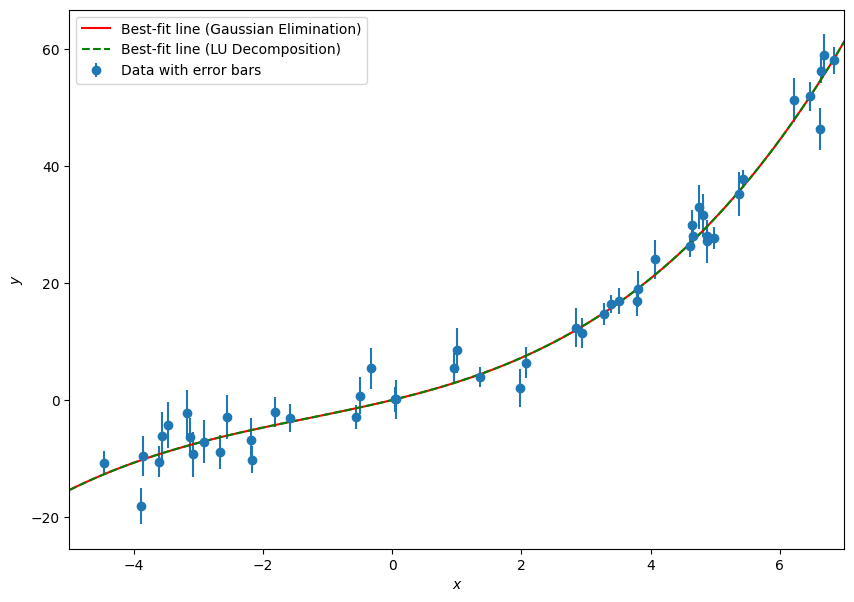

In [186]:
# Best-fit line
xx = np.linspace(-5, 7, 100)
y_fit_GE = a_GE[0] + a_GE[1]*xx + a_GE[2]*xx**2 + a_GE[3]*xx**3
y_fit_LU = a_LU[0] + a_LU[1]*xx + a_LU[2]*xx**2 + a_LU[3]*xx**3

# Make plot
plt.figure(figsize = (10, 7))

# Make sure you plot the data from part 1 and the best-fit line
plt.errorbar(x, y, yerr = sig_y, fmt = 'o', label = 'Data with error bars')
plt.plot(xx, y_fit_GE, 'r-', label = 'Best-fit line (Gaussian Elimination)')
plt.plot(xx, y_fit_LU, 'g--', label = 'Best-fit line (LU Decomposition)')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-5, 7)
plt.legend()
plt.show()

In [187]:
grader.check("q1.4")

q1.4 results: All test cases passed!

The inverse matrix $\bf C = \boldsymbol \alpha^{-1}$ is called the covariance matrix, which is closely related to the probable uncertainties of the estimated parameters $\bf a$. To estimate these uncertainties, we compute the variance associated with the estimate $a_j$. Following NR p.790, we obtain: <br><br>
$$ \sigma^2(a_j) = \sum_{k=0}^{M-1} \sum_{l=0}^{M-1} C_{jk} C_{jl} \alpha_{kl} = C_{jj} $$
<br>
<span style="color:blue"> <i> 5. Compute the error (standard deviation - square root of the variance) on the fitted parameters using the covariance matrix. </i></span><br>

In [188]:
from scipy.linalg import inv

cov_matrix = inv(alpha)
sigma_a0 = np.sqrt(cov_matrix[0,0])
sigma_a1 = np.sqrt(cov_matrix[1,1])
sigma_a2 = np.sqrt(cov_matrix[2,2])
sigma_a3 = np.sqrt(cov_matrix[3,3])

print('Error: on a0 =', sigma_a0, ', on a1 =', sigma_a1, ', on a2 =', sigma_a2, ', on a3 =', sigma_a3)

Error: on a0 = 0.7139418927087805 , on a1 = 0.22390274023290216 , on a2 = 0.06344814294696768 , on a3 = 0.011998696856719237


In [189]:
grader.check("q1.5")

q1.5 results: All test cases passed!

Now, instead of using the normal equations, we use singular value decomposition (SVD) to find the solution of least squares. Please read Ch. 15 of NR for more details. Remember that we have the $N \times M$ design matrix $\bf A$ and the vector $\bf b$ of length $N$. We wish to mind $\bf a$ which minimizes $\chi^2 = |\bf A \cdot a - b|^2$.
<br><br>
Using SVD, we can decompose $\bf A$ as the product of an $N \times M$ column-orthogonal matrix $\bf U$, an $M \times M$ diagonal matrix $\bf S$ (with positive or zero elements - the "singular" values), and the transpose of an $M \times M$ orthogonal matrix $\bf V$. ($\bf A = USV^{T}$). <br>
Let $\bf U_{(i)}$ and $\bf V_{(i)}$ denote the columns of $\bf U$ and $\bf V$ respectively (Note: We get $M$ number of vectors of length $M$.) $\bf S_{(i,i)}$ are the $i$th diagonal elements (singular values) of $\bf S$. Then, the solution of the above least squares problem can be written as:
<br>
$$ \bf a = \sum_{i=1}^M \big( \frac{U_{(i)} \cdot b}{S_{(i,i)}} \big) V_{(i)}. $$
<br><br>
The variance in the estimate of a parameter $a_j$ is given by:
$$ \sigma^2(a_j) = \sum_{i=1}^M \big( \frac{V_{ji}}{S_{ii}} \big)^2 $$
<br>
and the covariance:
$$ \mathrm{Cov}(a_j, a_k) = \sum_{i=1}^M \big( \frac{V_{ji}V_{ki}}{S_{ii}^2} \big). $$
<br><br>
<span style="color:blue"> <i> 6. Decompose the design matrix A using SVD. Estimate the parameter $a_i$'s and its variance. </i></span><br>

In [190]:
# Reference - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html
from scipy.linalg import svd

# Decompose A
# Note: S, in this case, is a vector of length M, which contains the singular values.
U, S, VT = svd(A, full_matrices=False)
V = VT.T

# Solve for a
a_from_SVD = V @ np.linalg.inv(np.diag(S)) @ U.T @ b

print('Using SVD:')
print('a0 =', a_from_SVD[0], ', a1 =', a_from_SVD[1], ', a2 =', a_from_SVD[2], ', a3 =', a_from_SVD[3])

Using SVD:
a0 = -0.030816295372740377 , a1 = 2.667646082249885 , a2 = 0.3148392700785279 , a3 = 0.07945935335134513


In [191]:
# Error on a
sigma_a_SVD = np.sqrt(np.diag(V @ np.linalg.inv(np.diag(S**2)) @ V.T))


print('Error: on a0 =', sigma_a_SVD[0], ', on a1 =', sigma_a_SVD[1], ', on a2 =', sigma_a_SVD[2], ', on a3 =', sigma_a_SVD[3])

Error: on a0 = 0.7139418927087816 , on a1 = 0.22390274023290302 , on a2 = 0.06344814294696764 , on a3 = 0.011998696856719265


In [192]:
grader.check("q1.6")

q1.6 results: All test cases passed!

Suppose that you are only interested in the parameters $a_0$ and $a_1$. We can plot the 2-dimensional confidence region ellipse for these parameters by building the covariance matrix:
$$ \mathrm{C'} =  \binom{\sigma({a_0})^2\ \ \ \ \ \ \mathrm{Cov}({a_0, a_1})}{\mathrm{Cov}({a_0, a_1}) \ \ \ \ \ \ \sigma({a_1})^2} $$
<br><br>
The lengths of the ellipse axes are the square root of the eigenvalues of the covariance matrix, and we can calculate the counter-clockwise rotation of the ellipse with the rotation angle:
$$ \theta = \frac{1}{2} \mathrm{arctan}\Big( \frac{2\cdot \mathrm{Cov}({a_0, a_1})}{\sigma({a_0})^2-\sigma({a_1})^2} \Big) = \mathrm{arctan}(\frac{\vec{v_1}(y)}{\vec{v_1}(x)}) $$
<br>
where $\vec{v_1}$ is the eigenvector with the largest eigenvalue. So we calculate the angle of the largest eigenvector towards the x-axis to obtain the orientation of the ellipse. <br><br>
<br>
Then, we multiply the axis lengths by some factor depending on the confidence level we are interested in. For 68%, this scale factor is $\sqrt{\Delta \chi^2} \approx 1.52$. For 95%, it is $\approx 2.48$.
<br><br>
<span style="color:blue"> <i> 7. Compute the covariance between $a_0$ and $a_1$. Plot the 68% and 95% confidence region of the parameter $a_0$ and $a_1$. </i></span><br>

In [193]:
from matplotlib.patches import Ellipse
import matplotlib as mpl
from numpy.linalg import eigvals

In [194]:
# Compute the covariance

# Build the covariance matrix
CovM = inv(alpha)  

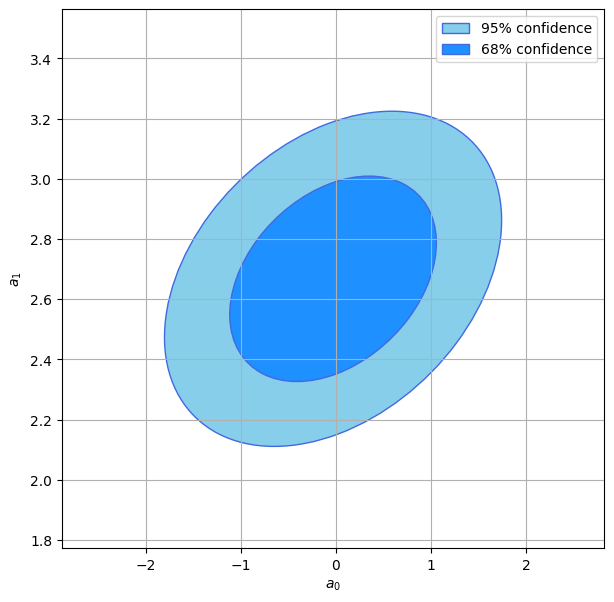

In [195]:
# Plot the confidence region (https://stackoverflow.com/questions/32371996/python-matplotlib-how-to-plot-ellipse)

eigvec, eigval, u = np.linalg.svd(CovM)

# Semimajor axis (diameter)
semimaj = np.sqrt(eigval[0])*2.
# Semiminor axis (diameter)
semimin = np.sqrt(eigval[1])*2.

theta = np.arctan(eigvec[0][1]/eigvec[0][0])

# Plot 1-sig confidence region
ell = mpl.patches.Ellipse(xy=[a_GE[0], a_GE[1]], width=1.52*semimaj, height=1.52*semimin, angle = theta*180/np.pi, facecolor = 'dodgerblue', edgecolor = 'royalblue', label = '68% confidence')
# Plot 2-sig confidence region
ell2 = mpl.patches.Ellipse(xy=[a_GE[0], a_GE[1]], width=2.48*semimaj, height=2.48*semimin, angle = theta*180/np.pi, facecolor = 'skyblue', edgecolor = 'royalblue', label = '95% confidence')

fig, ax = plt.subplots(figsize=(7,7))

ax.add_patch(ell2)
ax.add_patch(ell)


# Set bounds for x,y axes
bounds = np.sqrt(CovM.diagonal())
plt.xlim(a_GE[0]-4*bounds[0], a_GE[0]+4*bounds[0])
plt.ylim(a_GE[1]-4*bounds[1], a_GE[1]+4*bounds[1])

plt.grid(True)
plt.xlabel('$a_0$')
plt.ylabel('$a_1$')
plt.legend()
plt.show()

In [196]:
grader.check("q1.7")

q1.7 results: All test cases passed!

<!-- BEGIN QUESTION -->

In lecture, we discussed that we fit the existing data to obtain model parameters in data analysis, while in machine learning we use the model derived from the existing data to make prediction for new data.

Next, let us take the given data and do the polynomial regression.

First, split the sample into training data and the testing data. Keep 80% data as training data and uses the remaining 20% data for testing.

<span style="color:blue"> <i> 8. Often, the data can be ordered in a specific manner, hence shuffle the data prior to splitting it into training and testing samples. (Use https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html) </i></span><br>

In [197]:
np.random.seed(rng_seed)
arr = np.arange(50)
np.random.shuffle(arr)

train_x = x[arr[:40]]
train_y = y[arr[:40]]
train_sigy = sig_y[arr[:40]]
test_x = x[arr[40:]]
test_y = y[arr[40:]]
test_sigy = sig_y[arr[40:]]

<!-- END QUESTION -->

In the case of polynomial regression, we need to generate polynomial features (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for preprocessing. Note that we call each term in the polynomial as a "feature" in our model, and here we generate features' high-order (and interaction) terms. For example, suppose we set the degree of the polynomial to be 3. Then, the features of $X$ is transformed from $(X)$ to $(1, X, X^2, X^3)$. We can do this transform using PolynomialFeatures.fit_transform(train_x). But fit_transform() takes the numpy array of shape [n_samples, n_features]. So you need to re-define our training set as train_set_prep = train_x[:,np.newaxis] so that it has the shape [40,1].

<span style="color:blue"> <i> 9. Define three different polynomial models with degree of 1, 3, 10. (e.g. model = PolynomialFeatures(degree=...) ) Then, fit to data and transform it using "fit_transform"  </i></span><br>

In [198]:
# e.g.
# model = PolynomialFeatures(degree = ...)
# X_model = model.fit_transform(train_x[:,np.newaxis])

# Degree 1
model1 = PolynomialFeatures(degree=1)
X1 = model1.fit_transform(train_x[:, np.newaxis])
LR1 = linear_model.LinearRegression()
LR1.fit(X1, train_y)

# Degree 3
model3 = PolynomialFeatures(degree=3)
X3 = model3.fit_transform(train_x[:, np.newaxis])
LR3 = linear_model.LinearRegression()
LR3.fit(X3, train_y)

# Degree 10
model10 = PolynomialFeatures(degree=10)
X10 = model10.fit_transform(train_x[:, np.newaxis])
LR10 = linear_model.LinearRegression()
LR10.fit(X10, train_y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [199]:
grader.check("q1.9")

q1.9 results:
    q1.9 - 1 result:
        ❌ Test case failed
        Trying:
            np.all(np.isclose(X_poly3[:, 3], X_poly3[:, 1] ** 3))
        Expecting:
            np.True_
        **********************************************************************
        Line 1, in q1.9 0
        Failed example:
            np.all(np.isclose(X_poly3[:, 3], X_poly3[:, 1] ** 3))
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/doctest.py", line 1361, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1.9 0[0]>", line 1, in <module>
                np.all(np.isclose(X_poly3[:, 3], X_poly3[:, 1] ** 3))
                                  ^^^^^^^
            NameError: name 'X_poly3' is not defined

<!-- BEGIN QUESTION -->

Then, do the least squares linear regression. (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)

1. define the object for linear regression: LR = linear_model.LinearRegression()
2. Fit the linear model to the training data: LR.fit(transformed x data, y data)
3. Define new x samples for plotting: X_sample = np.linspace(-5, 7, 100)
4. Transform x sample: X_sample_transform = model.fit_transform(X_sample[:,np.newaxis])
4. Predict using the linear model: Y_sample = LR.predict(X_sample_transform)
5. Plot the fit: plt.plot(X_sample, Y_sample)


<span style="color:blue"> <i> 10. Do the linear regression for three different polynomial models defined in Part 9. Plot the fit on top of the training data (Label each curve). </i></span><br>

In [200]:
# Prepare sample x values and compute predictions from the three fitted models
xx = np.linspace(-5, 7, 300)
X_sample1 = model1.transform(xx[:, np.newaxis])
Y_sample1 = LR1.predict(X_sample1)

X_sample3 = model3.transform(xx[:, np.newaxis])
Y_sample3 = LR3.predict(X_sample3)

X_sample10 = model10.transform(xx[:, np.newaxis])
Y_sample10 = LR10.predict(X_sample10)

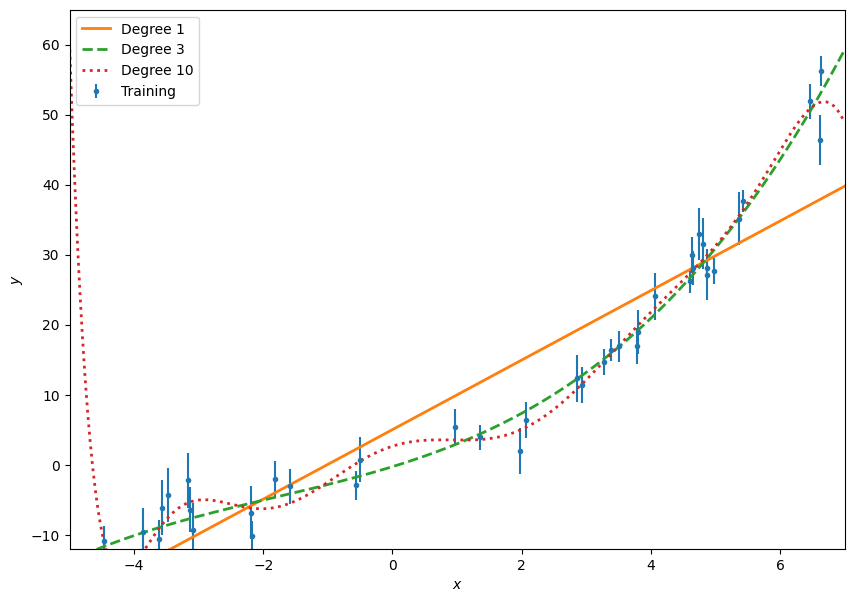

In [201]:
# Make plot
plt.figure(figsize = (10, 7))
plt.errorbar(train_x, train_y, yerr = train_sigy, fmt='.', label = 'Training')

# Plot predicted curves from three polynomial fits
plt.plot(xx, Y_sample1, '-', lw=2, label = 'Degree 1')
plt.plot(xx, Y_sample3, '--', lw=2, label = 'Degree 3')
plt.plot(xx, Y_sample10, ':', lw=2, label = 'Degree 10')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-5, 7)
plt.ylim(-12, 65)
plt.legend()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->


<span style="color:blue"> <i> 11. Plot the fit on top of the test data (Label each curve). </i></span><br>

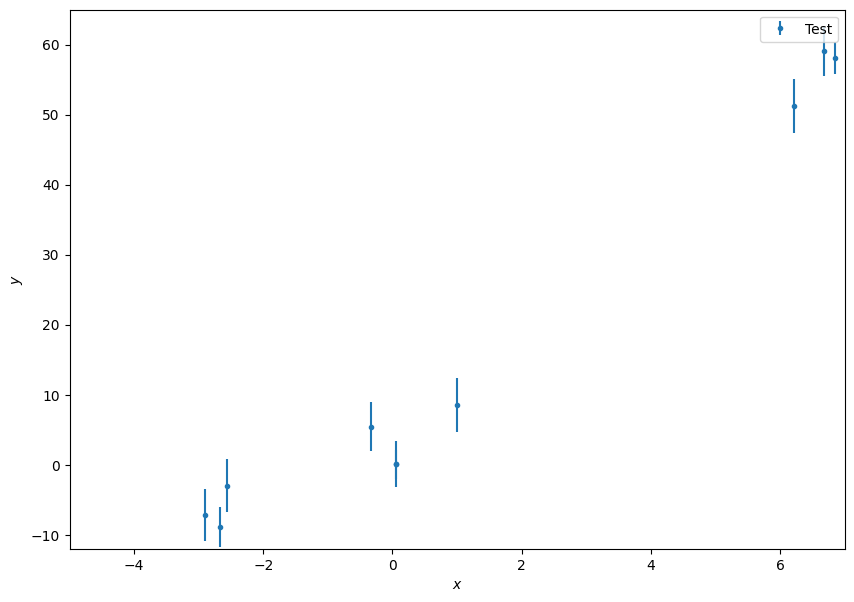

In [202]:
# Make plot
plt.figure(figsize = (10, 7))
plt.errorbar(test_x, test_y, yerr = test_sigy, fmt='.', label = 'Test')

...

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-5, 7)
plt.ylim(-12, 65)
plt.legend()
plt.show()

<!-- END QUESTION -->

You can obtain the estimated linear coefficients using linear_model.LinearRegression.coef_ (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


<span style="color:blue"> <i> 12. Print the linear coefficients of three polynomial models you used. For the polynomial of degree 10, do you see that high-order coefficients are very small? </i></span><br>

In [203]:

print('polynomial of degree 1: ', LR1.coef_)
print('polynomial of degree 3: ', LR3.coef_)
print('polynomial of degree 10: ', LR10.coef_)

polynomial of degree 1:  [0.         4.96592353]
polynomial of degree 3:  [0.         2.84067782 0.35455142 0.06495312]
polynomial of degree 10:  [ 0.00000000e+00  2.94918361e+00 -2.71857051e+00  1.04745440e-01
  6.37817874e-01 -5.72777914e-02 -4.37976955e-02  6.75010712e-03
  7.69292449e-04 -2.00062958e-04  9.86391001e-06]


***

<!-- BEGIN QUESTION -->

#### Problem 2 - Applying the PCA Method on Quasar Spectra

The following analysis is based on https://arxiv.org/pdf/1208.4122.pdf.
<br><br>
"Principal Component Analysis (PCA) is a powerful
and widely used technique to analyze data
by forming a custom set of “principal component”
eigenvectors that are optimized to describe the
most data variance with the fewest number of
components. With the full set of eigenvectors the data
may be reproduced exactly, i.e., PCA is a transformation
which can lend insight by identifying
which variations in a complex dataset are most
significant and how they are correlated. Alternately,
since the eigenvectors are optimized and
sorted by their ability to describe variance in the
data, PCA may be used to simplify a complex
dataset into a few eigenvectors plus coefficients,
under the approximation that higher-order eigenvectors
are predominantly describing fine tuned
noise or otherwise less important features of the
data." (S. Bailey, arxiv: 1208.4122)
<br><br>
In this problem, we take the quasar (QSO) spectra from the Sloan Digital Sky Survey (SDSS) and apply PCA to them. Filtering for high $S/N$ in order to apply the standard PCA, we select 18 high-$S/N$ spectra of QSOs with redshift 2.0 < z < 2.1, trimmed to $1340 < \lambda < 1620\ \mathring{A}$.

In [204]:
# Load data
wavelength = np.loadtxt("./Problem2_wavelength.txt")
flux = np.loadtxt("./Problem2_QSOspectra.txt")

In [205]:
# Data dimension
print( np.shape(wavelength) )
print( np.shape(flux) )

(824,)
(18, 824)


In the above cell, we load the following data: wavelength in Angstroms ("wavelength") and 2D array of spectra x fluxes ("flux").
<br><br>
We have 824 wavelength bins, so "flux" is 18 $\times$ 824 matrix, each row containing fluxes of different QSO spectra.
<br><br>
<span style="color:blue"> <i> 1. Plot any three QSO spectra flux as a function of wavelength. (In order to better see the features of QSO spectra, you may plot them with some offsets.) </i></span> <br>

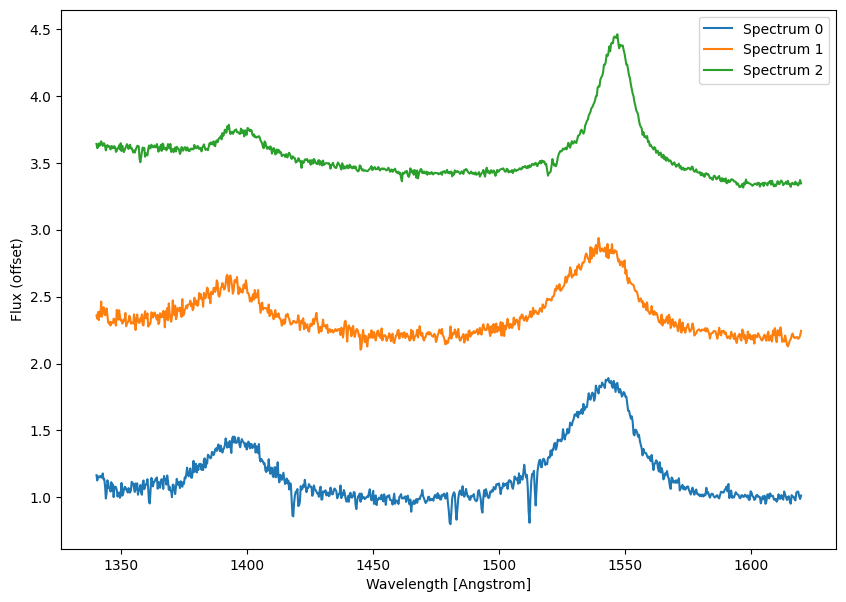

In [206]:
# Plot any three QSO spectra (with offsets to separate them visually)
plt.figure(figsize=(10,7))
max_flux = np.max(flux)
offset = 0.6 * max_flux
for i in range(3):
    plt.plot(wavelength, flux[i, :] + i*offset, label=f'Spectrum {i}')

plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux (offset)')
plt.legend()
plt.show()

<!-- END QUESTION -->

"Flux" is the data matrix of order 18 $\times$ 824. Call this matrix $\bf X$.
<br><br>
We can construct the covariance matrix $\bf C$ using the mean-centered data matrix. First, calculate the mean of each column and subtracts this from the column. Let $\bf X_c$ denote the mean-centered data matrix.<br><br>
$\bf X_c =
    \begin{bmatrix}
        x_{(1,1)} - \overline{x}_1 & x_{(1,2)} - \overline{x}_2 & \dots  & x_{(1,824)} - \overline{x}_{824} \\
        x_{(2,1)} - \overline{x}_1 & x_{(2,2)} - \overline{x}_2 & \dots  & x_{(2,824)} - \overline{x}_{824} \\
        \vdots & \vdots & \vdots & \vdots \\
        x_{(18,1)} - \overline{x}_1 & x_{(18,2)} - \overline{x}_2 & \dots  & x_{(18,824)} - \overline{x}_{824}
    \end{bmatrix}$
<br><br>
where $x_{m,n}$ denote the flux of $m$th QSO in $n$th wavelength bin, and $\overline{x}_k$ is the mean flux in $k$th wavelength bin.
<br><br>
Then, the covariance matrix is:
$\bf C$ $ = \frac{1}{N-1}$ $\bf X_c^T X_c.$ ($N$ is the number of QSOs.)
<br><br>
<span style="color:blue"><i> 2. Find the covariance matrix C using the data matrix flux. </i></span><br>


In [207]:
# Compute mean-centered data and covariance matrix
mu = flux.mean(axis=0)            # mean spectrum (length 824)
Xc = flux - mu                     # mean-centered data (18 x 824)

# Covariance matrix: (1/(N-1)) Xc^T Xc
C = (Xc.T @ Xc) / (flux.shape[0] - 1)

print(C)
print(C.shape)

[[ 0.00887242  0.0071261   0.00545652 ... -0.00275173 -0.00108354
  -0.00161095]
 [ 0.0071261   0.00828217  0.00589167 ... -0.00218301 -0.00049815
  -0.00113202]
 [ 0.00545652  0.00589167  0.00551605 ... -0.00182602 -0.0009455
  -0.00073133]
 ...
 [-0.00275173 -0.00218301 -0.00182602 ...  0.00172045  0.00128142
   0.00135948]
 [-0.00108354 -0.00049815 -0.0009455  ...  0.00128142  0.00167203
   0.00123279]
 [-0.00161095 -0.00113202 -0.00073133 ...  0.00135948  0.00123279
   0.00169132]]
(824, 824)


In [208]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<span style="color:blue"> <i> 3. Using numpy.linalg, find eigenvalues and eigenvectors of the covariance matrix. Order the eigenvalues from largest to smallest and then plot them as a function of the number of eigenvalues. (Remember that the eigenvector with the highest eigenvalue is the principle component of the data set.)
In this case, we find that our covariance matrix is rank-17 matrix, so we only select the first 17 highest eigenvalues and corresponding eigenvectors (other eigenvalues are close to zero). </i></span><br>

In [209]:
np.linalg.matrix_rank(C)

np.int64(17)

In [210]:
from numpy.linalg import eig

# Compute eigenvalues and eigenvectors of the covariance matrix
eigval, eigvec = eig(C)

# Sort eigenvalues (and eigenvectors) from largest to smallest
idx = np.argsort(eigval)[::-1]
eigval_sorted = eigval[idx]
eigvec_sorted = eigvec[:, idx]

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


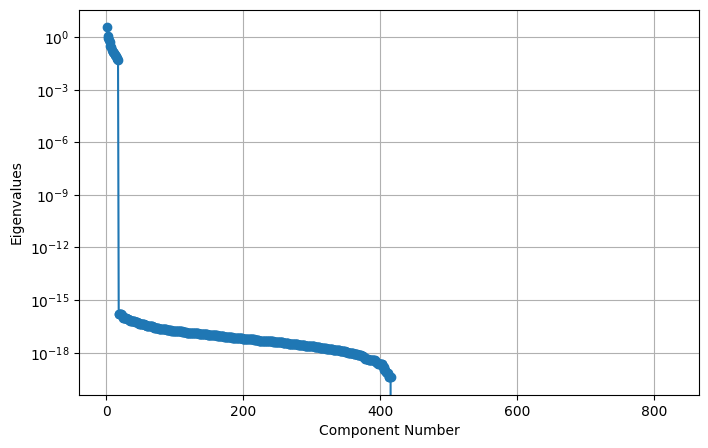

In [211]:
# Plot sorted eigenvalues
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(eigval_sorted)+1), eigval_sorted, 'o-')
plt.ylabel('Eigenvalues')
plt.xlabel('Component Number')
plt.yscale('log')
plt.grid(True)
plt.show()

In [212]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 4. Plot the first three eigenvectors. These eigenvectors
represent the principal variations of the spectra with respect to that mean spectrum. </i></span><br>

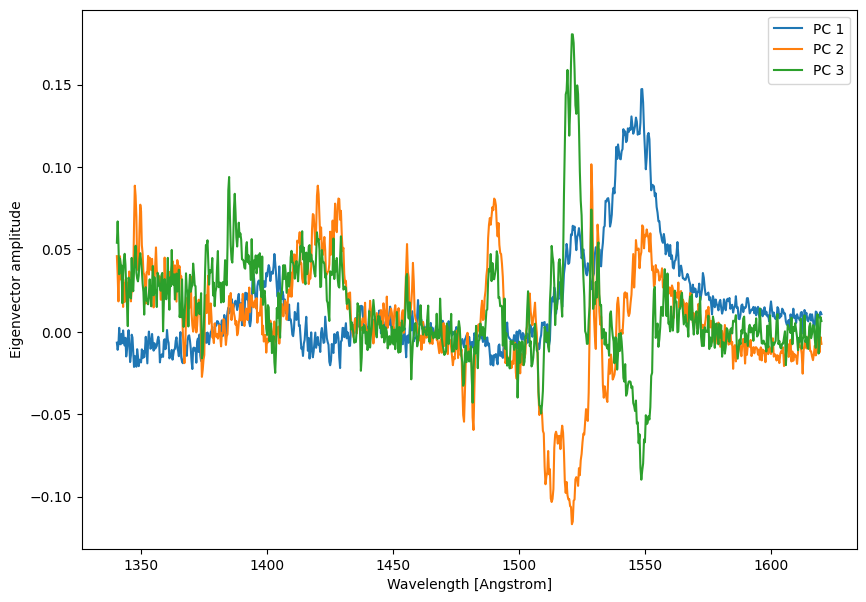

In [213]:
# Plot the first three eigenvectors (principal components)
plt.figure(figsize=(10,7))
for i in range(3):
    plt.plot(wavelength, eigvec_sorted[:, i], label=f'PC {i+1}')

plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Eigenvector amplitude')
plt.legend()
plt.show()

<!-- END QUESTION -->

The eigenvectors indicate the direction of the principal components, so we can re-orient the data onto the new zes by multiplying the original mean-centered data by the eigenvectors. We call the re-oriented data "PC scores." (Call the PC score matrix $\bf Z$) Suppose that we have $k$ eigenvectors. Construct the matrix of eigenvectors $\bf V = [v_1 v_2 ... v_k]$, with $\bf v_i$ the $i$th highest eigenvector. Then, we can get 18 $\times\ k$ PC score matrix by multiplying the 18 $\times$ 824 data matrix with the 824 $\times\ k$ eigenvector matrix:
<br><br>
$$ \bf Z = X_c V $$
<br><br>
Then, we can reconstruct the data by mapping it back to 824 dimensions with $\bf V^T$:
<br><br>
$$ \bf \hat{X} = \boldsymbol \mu + Z V^T $$
where $\boldsymbol \mu$ is the vector of mean QSO flux.
<br><br>
Now, comparing the original data with the reconstructed data, we can calculate the residuals. Let $\bf X_{(i)}, \hat{X}_{(i)}$ denote the rows of $\bf X, \hat{X}$ respectively. Remember that the data matrix has the dimension 18 $\times$ 824, so each row $\bf X_{(i)}$ corresponding the spectra of one particular QSO. (For example, if you wish to see the QSO spectra in row 7, you can plot $\bf X_{(7)}$ as a function of wavelength.). Then, we can simply calculate the residual as $\frac{1}{N} \sum_{i=1}^N \bf |\hat{X}_{(i)} - X_{(i)}|^2$ where $N$ is the total number of QSOs (NOTE: $\bf |\hat{X}_{(i)} - X_{(i)}|$ is the magnitude of the difference between two vectors $\bf \hat{X}_{(i)}$ and $\bf X_{(i)}$.)
<br><br>
<span style="color:blue"> <i> 5. First, start with only mean flux value $\boldsymbol \mu$ (in this case $\bf \hat{X} = \boldsymbol \mu, V = 0$) and calculate the residual. Then, do the reconstruction using the first two principal eigenvectors $\bf V = [v_1 v_2]$ and calculate the residual. Finally, let $\bf V = [v_1 v_2 ... v_6]$ (the first six principal eigenvectors) and compute the residual. </i></span><br>


In [214]:
# Compute reconstruction residuals for different numbers of eigenvectors
mu = flux.mean(axis=0)
Xc = flux - mu

# Residual for V=0 (only mean)
hat0 = np.tile(mu, (flux.shape[0], 1))
res0 = np.mean(np.sum((hat0 - flux)**2, axis=1))

# Reconstruction with first two eigenvectors
V1 = eigvec_sorted[:, :2]
Z1 = Xc @ V1
recons1 = mu + Z1 @ V1.T
res1 = np.mean(np.sum((recons1 - flux)**2, axis=1))

# Reconstruction with first six eigenvectors
V6 = eigvec_sorted[:, :6]
Z6 = Xc @ V6
recons2 = mu + Z6 @ V6.T
res2 = np.mean(np.sum((recons2 - flux)**2, axis=1))

print(res0, res1, res2)

7.838200342799573 (3.360545086468324+0j) (1.21990522371288+0j)


In [215]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 6. For any two QSO spectra, plot the original and reconstructed spectra using the first six principal eigenvectors. </i></span><br>

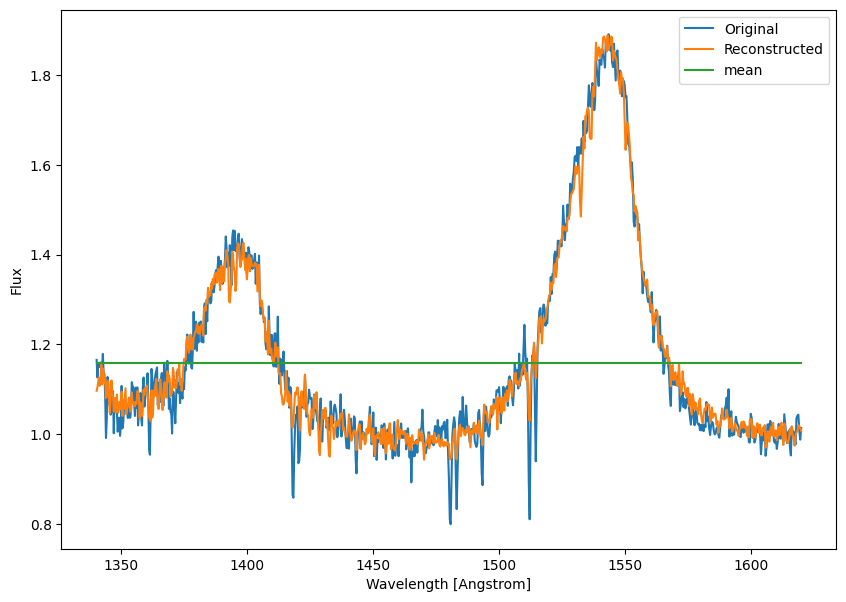

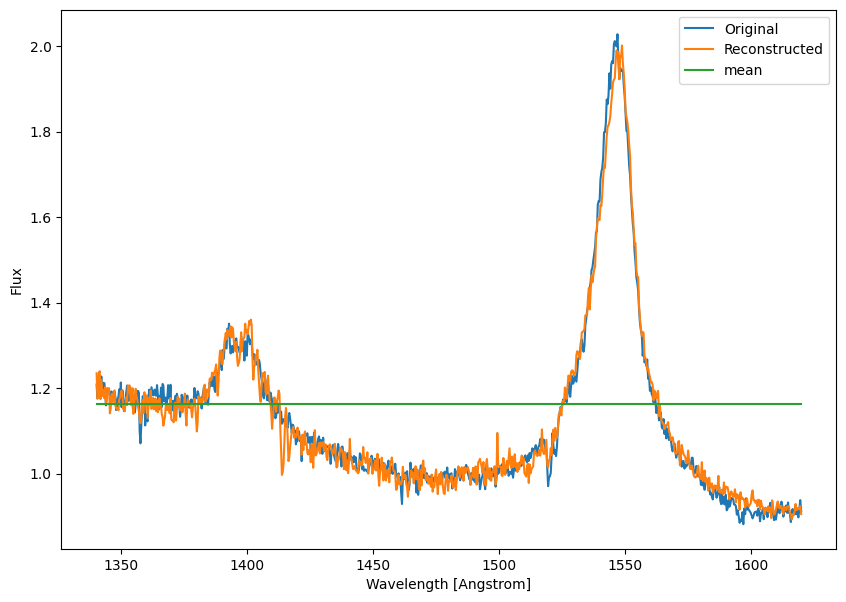

In [216]:
# BEGIN SOLUTION
fig = plt.figure(figsize = (10,7))
i = 0
plt.plot(wavelength, flux[i,:], label = 'Original')
plt.plot(wavelength, recons2[i,:], label = 'Reconstructed')
plt.plot(wavelength, mu[i]*np.ones(824), label = 'mean')
plt.legend()
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux')
plt.show()

fig = plt.figure(figsize = (10,7))
i = 2
plt.plot(wavelength, flux[i,:], label = 'Original')
plt.plot(wavelength, recons2[i,:], label = 'Reconstructed')
plt.plot(wavelength, mu[i]*np.ones(824), label = 'mean')
plt.legend()
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux')
plt.show()
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 7. Plot the residual as a function of the number of included eigenvectors. </i></span><br>

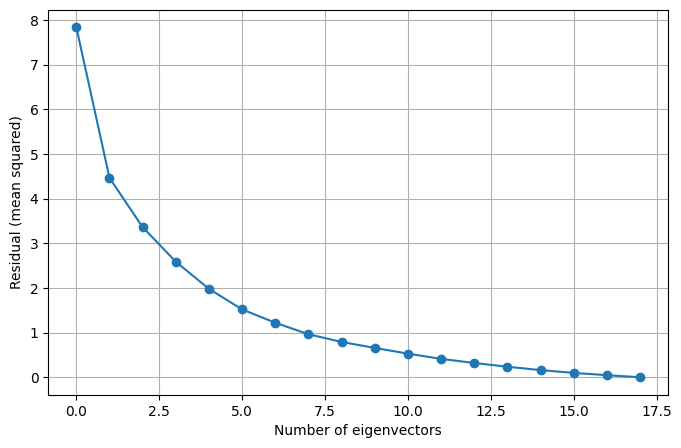

In [217]:
# Plot residual as a function of the number of included eigenvectors
residuals = []
ks = list(range(0, min(17, eigvec_sorted.shape[1]) + 1))
for k in ks:
    if k == 0:
        recons = np.tile(mu, (flux.shape[0], 1))
    else:
        V = eigvec_sorted[:, :k]
        Z = Xc @ V
        recons = mu + Z @ V.T
    residuals.append(np.mean(np.sum((recons - flux)**2, axis=1)))

plt.figure(figsize=(8,5))
plt.plot(ks, residuals, 'o-')
plt.xlabel('Number of eigenvectors')
plt.ylabel('Residual (mean squared)')
plt.grid(True)
plt.show()

<!-- END QUESTION -->

In this problem, we only have 18 QSO spectra, so the idea of using PCA may seem silly. We can also use SVD to find eigenvalues and eigenvectors. With SVD, we get $\bf X_c = USV^T$. Then, the covariance matrix is $\bf C$ $ = \frac{1}{N-1}$ $\bf X_c^T X_c$ $ = \frac{1}{N-1}$ $\bf VS^2V^T.$ Then, the eigenvalues are the squared singular values scaled by the factor $\frac{1}{N-1}$ and the eigenvectors are the columns of $\bf V$.
<br><br>
<span style="color:blue"> <i> 8. Find the eigenvalues applying SVD to the mean-centered data matrix $\bf X_c$. </i></span><br>

In [218]:
from scipy.linalg import svd

# Compute SVD of the mean-centered data matrix Xc
U, S, VT = svd(Xc, full_matrices=False)

# Eigenvalues of covariance from singular values: (S^2)/(N-1)
eigval_SVD = (S**2) / (flux.shape[0] - 1)
# Sort descending
eigval_SVD_sorted = np.sort(eigval_SVD)[::-1]
print(eigval_SVD_sorted)

[3.57183360e+00 1.16921314e+00 8.19491399e-01 6.43886056e-01
 4.87138879e-01 3.16043520e-01 2.72246202e-01 1.83227778e-01
 1.41340818e-01 1.35417557e-01 1.24349547e-01 9.68536857e-02
 8.91735508e-02 8.05492370e-02 6.53953675e-02 5.46083371e-02
 4.85022745e-02 3.05988485e-30]


In [219]:
grader.check("q2.8")

q2.8 results: All test cases passed!

***

#### Problem 3 - MNIST

Yann LeCun and collaborators collected and processed 70,000 handwritten digits to produce what became known as the most widely used database in ML, called MNIST. In this assignment, we are going to work with this dataset. Each handwritten digit comes in a square image, divided into a 28×28 pixel grid. Every pixel can take on 256 nuances of the gray color, interpolating between white and black, and hence each the data point assumes any value in the set {0,1,…,255}. There are 10 categories in the problem, corresponding to the ten digits.

Ever since, the MNIST problem has become an important standard for benchmarking the performance of more sophisticated Machine Learning models. Often times, there are contests for finding a new constellation of hyperparameters and/or model architecture which results in a better accuracy for correctly classifying the digits.

In this exercise, we use the PCA method for dimensionality reduction to reduce the MNIST dataset to 10 digits.

As mentioned in Problem 2, PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed. It does not do this using guesswork but using hard mathematics and it uses something known as the eigenvalues and eigenvectors of the data-matrix. These eigenvectors of the covariance matrix have the property that they point along the major directions of variation in the data. These are the directions of maximum variation in a dataset. Here, we use the scikit-learn implementation of PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

First, load the MNIST data:
(Note: Here, we load only 20% of the whole MNIST data - hence, 14,000 digits.)

In [220]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data
Y = mnist.target

X = X.to_numpy()
Y = Y.to_numpy()

In [221]:
X.shape

(70000, 784)

"$X$" contains information about the given MNIST digits. We have a 28x28 pixel grid, so each image is a vector of length 784; we have 70,000 images (digits), so $X$ is a 70,000x784 matrix. "$Y$" is a label (0-9; the category to which each image belongs) vector of length 70,000.

<span style="color:blue"> <i> 1. Do the following:

(1) Randomly shuffle data (i.e. randomize the order)

  (Note: The label $Y_1$ corresponds to a vector $X_{1j}$, and even after shuffling, $Y_1$ should still correspond to $X_{1j}$.)
  
  
(2) Select 1/3 of the data. (You are free to work with a larger set of the data, but it will take much longer time to train.)


(3) Split data into training and test samples using train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Set train_size = 0.8. (80% of $X$ is our training samples.) Print the dimension of training and test samples. </i></span> <br>

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

# shuffle and select only 1/3 of data
random_state = check_random_state(rng_seed)
indices = random_state.permutation(len(X))
take = len(X) // 3
sel = indices[:take]
X_sub = X[sel]
Y_sub = Y[sel]

# pick training and test data sets
X_train, X_test, Y_train, Y_test = train_test_split(X_sub, Y_sub, train_size=0.8, random_state=rng_seed)

print(np.shape(X_train), np.shape(Y_train))
print(np.shape(X_test), np.shape(Y_test))

(18666, 784) (18666,)
(4667, 784) (4667,)


In [223]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

Many machine learning algorithms are also not scale invariant, and hence we need to scale the data (different features to a uniform scale). All this comes under preprocessing the data. (http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) PCA is a prime example of when such normalization is important; if the variables are not measured on the same scale, then each principal component can be dominated by a single variable.

In this exercise, the MNIST pixel values in images should also be scaled prior to providing the images as an input to PCA. There are three main types of pixel scaling techniques: normalization (scaling pixel to the range 0-1), centering (scale pixel values to have a zero-mean), and standardization (scale pixel values to have a zero-mean and unit-variance).

First, let us try normalization. Each pixel contains a greyscale value quantified by an integer between 0 and 255. To standardize the dataset, we normalize the "$X$" data in the interval [0, 1].

<span style="color:blue"> <i> 2. Normalize the X data (both training and test).

In [224]:
# Keep originals, then normalize pixel values to [0,1]
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

X_train = X_train / 255.0
X_test = X_test / 255.0

In [225]:
from sklearn.decomposition import PCA

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

(1) Define the PCA model with the first 2 principal components:

&nbsp; **pca = PCA(n_components=2)**

(2) Using "fit_transform," fit the model with the training X data and apply the dimensionality reduction on it.

&nbsp; **X_train_PCA = pca.fit_transform(training X data)**

(3) With the same model, apply the dimensionality reduction on the test X data.

&nbsp; **X_test_PCA = pca.transform(test X data)**

<span style="color:blue"> <i> 3. This problem is similar to HW3-Q4-Part3. For both training and test samples, create a scatterplot of the first and second principal component and color each of the different types of digits with a different color. Label each axis (e.g. x-axis: 1st principal component, y-axis: 2nd principal component). How does it compare to the UMAP results?

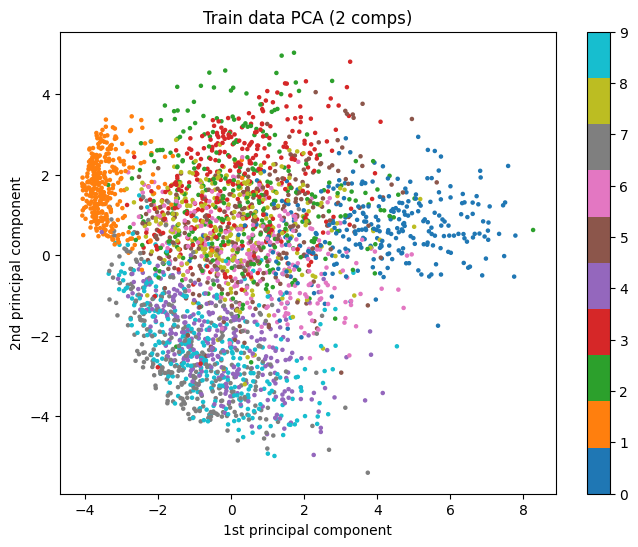

In [226]:
# PCA with 2 components and scatter plot colored by label
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

# Convert labels to integers for plotting
Y_train_int = Y_train.astype(int)
Y_test_int = Y_test.astype(int)

# Quick scatter (may be dense); show a subset for clarity if large
nshow = min(3000, X_train_PCA.shape[0])
plt.figure(figsize=(8,6))
plt.scatter(X_train_PCA[:nshow,0], X_train_PCA[:nshow,1], c=Y_train_int[:nshow], s=5, cmap='tab10')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Train data PCA (2 comps)')
plt.colorbar()
plt.show()

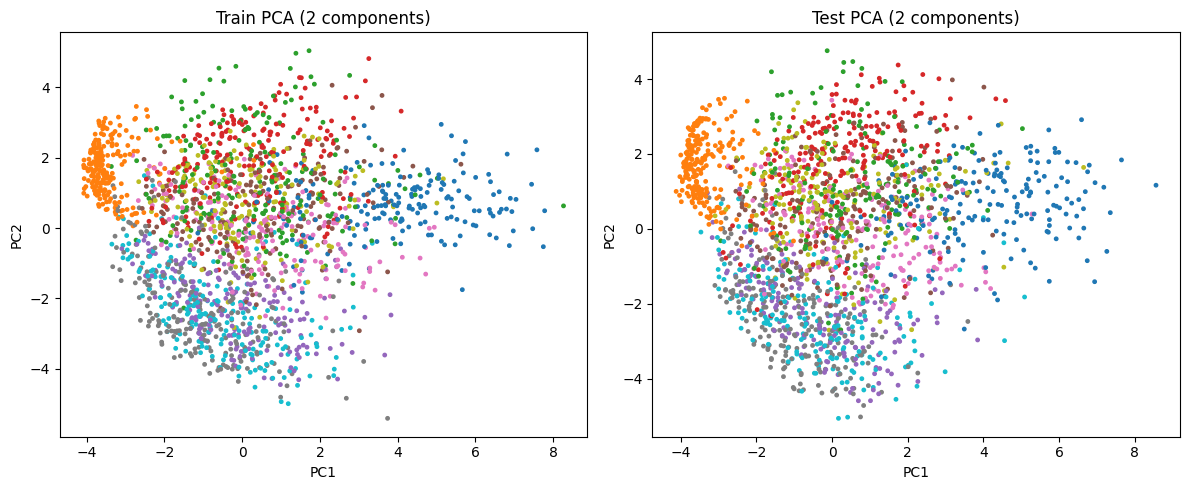

In [227]:
# Make the figures for both train and test PCA projections
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_train_PCA[:2000,0], X_train_PCA[:2000,1], c=Y_train_int[:2000], s=6, cmap='tab10')
plt.title('Train PCA (2 components)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1,2,2)
plt.scatter(X_test_PCA[:2000,0], X_test_PCA[:2000,1], c=Y_test_int[:2000], s=6, cmap='tab10')
plt.title('Test PCA (2 components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 4. Select the first three principal components and make 3D scatterplot on the training data. (similar to HW3-Q4-Part5)

In [228]:
from mpl_toolkits.mplot3d import Axes3D

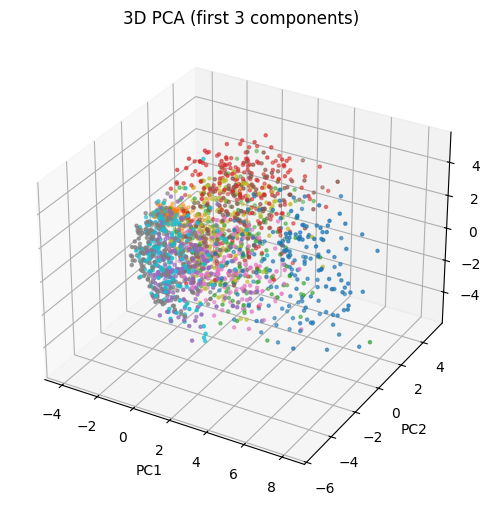

In [229]:
# 3D scatter of first three principal components
from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
X_train_3 = pca3.fit_transform(X_train)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
idx = np.arange(min(2000, X_train_3.shape[0]))
sc = ax.scatter(X_train_3[idx,0], X_train_3[idx,1], X_train_3[idx,2], c=Y_train_int[idx], cmap='tab10', s=5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA (first 3 components)')
plt.show()

<!-- END QUESTION -->

From the graph we can see the two or three components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart. There are other techniques, such as UMAP module or t-SNE (t-Distributed Stochastic Neighbouring Entities), which can better reduce the dimensions for visualisation.

***

In [230]:
from sklearn.neighbors import KNeighborsClassifier as knn

Now, we will introduce K-nearest neighbors (KNN), one of the most widely used machine learning classification techniques. We use scikit-learn implementation of KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

Ideally, we should tune KNN hyperparameters by doing a grid search using k-fold cross validation, but in this exercise we simply use default parameters with n_neighbors = 6.

(1) Define the knn classifier

&nbsp; **clf = knn(n_neighbors=6)**

(2) Fit the model

&nbsp; **clf.fit(training X data, training Y/target data)**

(3) Get the classification accuracy on the test data

&nbsp; **clf.score(test X data, test Y/target data)**

<span style="color:blue"> <i> 5. Evaluate the classification accuracy on the test data using a KNN classifier.

In [231]:
# KNN classifier on full (normalized) features
clf = knn(n_neighbors=6)
# Ensure labels are integers
Y_train_int = Y_train.astype(int)
Y_test_int = Y_test.astype(int)
clf.fit(X_train, Y_train_int)

# Evaluate
test_score = clf.score(X_test, Y_test_int)
print(test_score)

0.9522176987358046


In [232]:
grader.check("q3.5")

q3.5 results: All test cases passed!

<!-- BEGIN QUESTION -->

The above KNN classifier considers all 784 features for each image when making its decisions. What if you do not need that many? It is possible that a lot of those features do not really affect our predictions that much. Or worse, KNN could be considering feature anomalies that are unique to our training data, resulting in overfitting. One way to deal with this is by removing features that aren’t contributing much.

Now, suppose you take the first two principal components from PCA and fit your model using those two components.

&nbsp; **pca = PCA(n_components=2)**

&nbsp; **X_train_PCA = pca.fit_transform(training X data)**

&nbsp; **X_test_PCA = pca.transform(test X data)**

Now you can take X_train_PCA, along with training Y data, to fit the KNN model and evaluate the classification accuracy.

<span style="color:blue"> <i> 6. Evaluate the classification accuracy with different number of PCA componenets. Let N_PCA_component = [2, 10, 25, 50, 100, 200, 400, 700]. Plot classification accuracy vs. number of PCA components. How does it compare to the accuracy in Part 5? Draw a horizontal line for the accuracy with all 784 features.

In [233]:
# Evaluate classification accuracy with different numbers of PCA components
from sklearn.decomposition import PCA
components = [2, 10, 25, 50, 100, 200, 400, 700]
sc_all = []
for n in components:
    pca_n = PCA(n_components=n)
    X_tr = pca_n.fit_transform(X_train)
    X_te = pca_n.transform(X_test)
    clf_n = knn(n_neighbors=6)
    clf_n.fit(X_tr, Y_train_int)
    sc_all.append(clf_n.score(X_te, Y_test_int))

# Baseline score with all features (already computed in previous cell as test_score)
score_all = test_score
print('components:', components)
print('scores:', sc_all)
print('baseline (all features):', score_all)

components: [2, 10, 25, 50, 100, 200, 400, 700]
scores: [0.43004071137775873, 0.9179344332547675, 0.9610027855153204, 0.9612170559245768, 0.9595028926505249, 0.9526462395543176, 0.9530747803728306, 0.9522176987358046]
baseline (all features): 0.9522176987358046


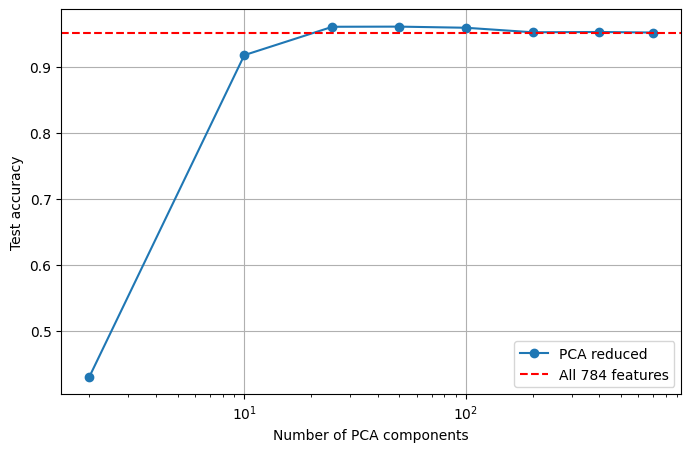

In [234]:
# Plot classification accuracy vs number of PCA components
plt.figure(figsize=(8,5))
plt.plot(components, sc_all, 'o-', label='PCA reduced')
plt.axhline(score_all, color='r', linestyle='--', label='All 784 features')
plt.xlabel('Number of PCA components')
plt.ylabel('Test accuracy')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [235]:
grader.check("q3.6")

q3.6 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Instead of pixel normalization, we can also try feature rescaling through standardization (rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one). We can use sklearn.preprocessing.StandardScaler for this job.


In [236]:
from sklearn.preprocessing import StandardScaler

(1) Define the StandardScaler

&nbsp; **sc = StandardScaler()**

(2) Fit the training X data and then transform it.

&nbsp; **X_train = sc.fit_transform(training X data)**

(3) Perform standardization on the test X data.

&nbsp; **X_test = sc.transform(test X data)**

<span style="color:blue"> <i> 7. Re-load the MNIST data and try standardization on both training and test X data following the above steps. Evaluate the classification accuracy using a KNN classifier. How does it compare to Part 5? **(Note: Here we're looking for both a code and a short written answer)**

In [237]:
# Standardization (re-load originals if available) and evaluate KNN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_orig)
X_test_std = scaler.transform(X_test_orig)

clf_std = knn(n_neighbors=6)
clf_std.fit(X_train_std, Y_train_int)
test_score = clf_std.score(X_test_std, Y_test_int)
print(test_score)

0.9217913006213841


In [238]:
# print test score from standardization run above
print(test_score)

0.9217913006213841


<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload the .zip file to gradescope!

In [239]:
# Save your notebook first, then run this cell to export your submission.
grader.export()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/otter/check/notebook.py:494: UserWarning: Could not locate a PDF to include
  warnings.warn("Could not locate a PDF to include")


PandocMissing: Pandoc wasn't found.
Please check that pandoc is installed:
https://pandoc.org/installing.html